In [1]:
%%capture --no-display
!pip install moviepy
!pip install --upgrade tvb-library
!pip install --upgrade tvb-data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tvb_model_reference.src.nuu_tools_simulation_human as tools

from tvb_model_reference.simulation_file.parameter.parameter_M_Berlin import Parameter
from tvb_model_reference.view.plot_human import multiview_one, prepare_surface_regions_human
from JUSUFlike.Project.Codes.analyses import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

parameters = Parameter()

c:\users\david\appdata\local\programs\python\python38\lib\site-packages\tvb\datatypes\surfaces.py:64: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


# Loading results

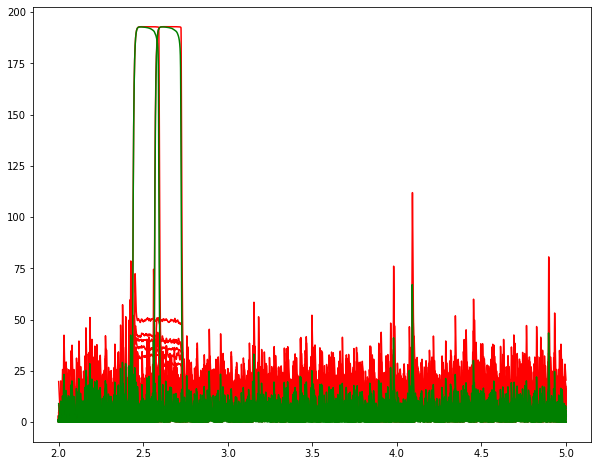

In [3]:
# Select a folder_root

folder_root = '/media/master/Nuevo vol/Internship/Data/hpc_tvbadex/results_jusuf/' # Hard disk in ubuntu
# Define the parameters that we will use
cut_transient = 2000.0
run_sim = 5000.0

S = 0.5
b_e = 120.0
E_L_e = -60.0
E_L_i = -80.0
T = 5.0

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

label_sim = '_a_' + str(S) + '_b_' + str(b_e) + '_ELI_' + str(E_L_i) + \
            '_ELE_' + str(E_L_e) + '_T_' + str(T) + '/'

file_name = folder_root + label_sim

# Draw plots of the firing rates
result = tools.get_result(file_name,cut_transient,run_sim)
time_s = result[0][0]*1e-3 #from ms to sec
FR_exc = result[0][1][:,0,:]*1e3 # from KHz to Hz; Excitatory firing rate
FR_inh = result[0][1][:,1,:]*1e3 # from KHz to Hz; Inhibitory firing rate
time_s = np.array(time_s, dtype=float)
del result

ax.plot(time_s, FR_inh, label=r'$v_i$', c='r')
ax.plot(time_s, FR_exc, label=r'$v_e$', c='g')

plt.show()

# Understanding the parcellation and the names of the regions in the model. MAIN OBJECTIVE: FINDING NODES INVOLVED IN DMN

In [3]:
# Prepare the elements that we will need to find the interesting nodes
cortex, conn, hem_left, hem_right = prepare_surface_regions_human(parameters, 
                                                                  conn_filename='Connectivity.zip',
                                                                  zip_filename='Surface_Cortex.zip',
                                                                  region_map_filename='RegionMapping.txt')
the_data = np.zeros((cortex.region_mapping_data.array_data.shape[0],))

In [5]:
# Highlight each of the regions in the brain
# for id_region in range(len(conn.region_labels)):
#     multiview_one(cortex, hem_left, hem_right, 
#                   [id_region], the_data, plt.figure(), suptitle='', 
#                   title=conn.region_labels[id_region], figsize=(8, 8), shaded=False)
#     plt.show()
#     plt.close()

In [6]:
# List of the regions in our model
print(conn.region_labels)

['bankssts_L' 'bankssts_R' 'caudalanteriorcingulate_L'
 'caudalanteriorcingulate_R' 'caudalmiddlefrontal_L'
 'caudalmiddlefrontal_R' 'cuneus_L' 'cuneus_R' 'entorhinal_L'
 'entorhinal_R' 'frontalpole_L' 'frontalpole_R' 'fusiform_L' 'fusiform_R'
 'inferiorparietal_L' 'inferiorparietal_R' 'inferiortemporal_L'
 'inferiortemporal_R' 'insula_L' 'insula_R' 'isthmuscingulate_L'
 'isthmuscingulate_R' 'lateraloccipital_L' 'lateraloccipital_R'
 'lateralorbitofrontal_L' 'lateralorbitofrontal_R' 'lingual_L' 'lingual_R'
 'medialorbitofrontal_L' 'medialorbitofrontal_R' 'middletemporal_L'
 'middletemporal_R' 'paracentral_L' 'paracentral_R' 'parahippocampal_L'
 'parahippocampal_R' 'parsopercularis_L' 'parsopercularis_R'
 'parsorbitalis_L' 'parsorbitalis_R' 'parstriangularis_L'
 'parstriangularis_R' 'pericalcarine_L' 'pericalcarine_R' 'postcentral_L'
 'postcentral_R' 'posteriorcingulate_L' 'posteriorcingulate_R'
 'precentral_L' 'precentral_R' 'precuneus_L' 'precuneus_R'
 'rostralanteriorcingulate_L' 'ro

# List of regions that are involved in DMN in litterature

Main functional hubs of the DMN:
1. medial prefrontal cortex
2. posterior cingulate cortex / precuneus
3. angular gyrus

## 1. Finding indexes of Posterior cingulate / Precuneus
We have both the posterior cingulate cortex and the precuneus in our lists

In [7]:
for i, label in enumerate(conn.region_labels):
    if 'posteriorcingulate' in label or 'precuneus' in label:
        print(f'region {label} has index {i}')

region posteriorcingulate_L has index 46
region posteriorcingulate_R has index 47
region precuneus_L has index 50
region precuneus_R has index 51


The default mode network is most commonly defined with resting state data by putting a seed in the Posterior cingulate cortex and examining which other brain areas most correlate with this area.


Independent component analysis (ICA) robustly finds the DMN for individuals and across groups, and has become the standard tool for mapping the default network.


It has been shown that the default mode network exhibits the highest overlap in its structural and functional connectivity, which suggests that the structural architecture of the brain may be built in such a way that this particular network is activated by default. Very interesting! Indicates that we should be able to get closer to it having the connectome!
(all from Wikipedia but it's cited and looks okay)

## 2. Looking for indexes of angular gyrus in our model

Inferioparietal i think are the closest ones to the angular gyrus. Additionally, the supramarginal gyrus is also really close

In [8]:
for i, label in enumerate(conn.region_labels):
    if 'inferio' in label or 'supramarginal' in label or 'isthmus' in label:
        print(f'region {label} has index {i}')

region inferiorparietal_L has index 14
region inferiorparietal_R has index 15
region inferiortemporal_L has index 16
region inferiortemporal_R has index 17
region isthmuscingulate_L has index 20
region isthmuscingulate_R has index 21
region supramarginal_L has index 62
region supramarginal_R has index 63


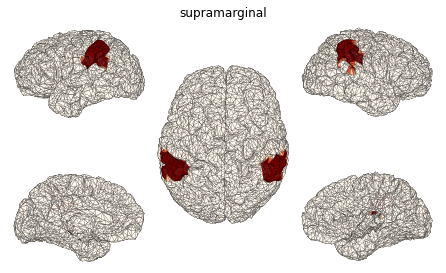

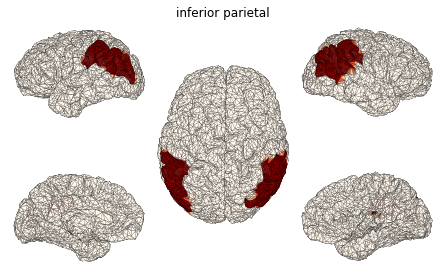

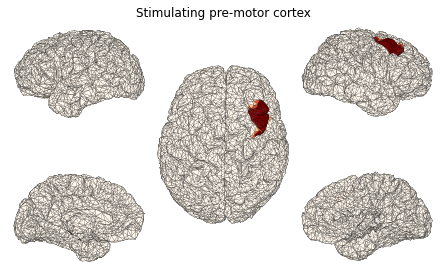

In [4]:
id_regions = [62, 63]
title = 'supramarginal'
multiview_one(cortex, hem_left, hem_right, 
              [62, 63], the_data, plt.figure(), suptitle='', 
              title=title, figsize=(8, 8), shaded=False)

id_regions = [14, 15, 62, 63]
title = 'inferior parietal'
multiview_one(cortex, hem_left, hem_right, 
              id_regions, the_data, plt.figure(), suptitle='', 
              title=title, figsize=(20, 20), shaded=False)

id_regions = [5]
title = 'Stimulating pre-motor cortex'
multiview_one(cortex, hem_left, hem_right, 
              id_regions, the_data, plt.figure(), suptitle='', 
              title=title, figsize=(20, 20), shaded=False)

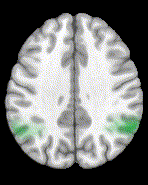
https://upload.wikimedia.org/wikipedia/commons/c/c4/Angular_gyrus_sagittal_sections.gif
https://upload.wikimedia.org/wikipedia/commons/a/a3/Angular_gyrus_transversal_sections.gif
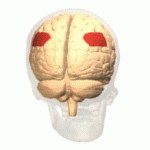

### Conclusion on looking for the angular gyrus
We can see that the angular gyrus is not isolated in our brain parcellation. Therefore, any region that we try to use as angular gyrus will also have influences (in dynamics and connectivity) from other regions near the angular gyurs. For these reasons, the angular gyrus will be ignored from now on.

It can be re-discussed later on.

## 3. Looking for indexes of the medial prefrontal cortex

What does the medial prefrontal cortex contain?

<div>
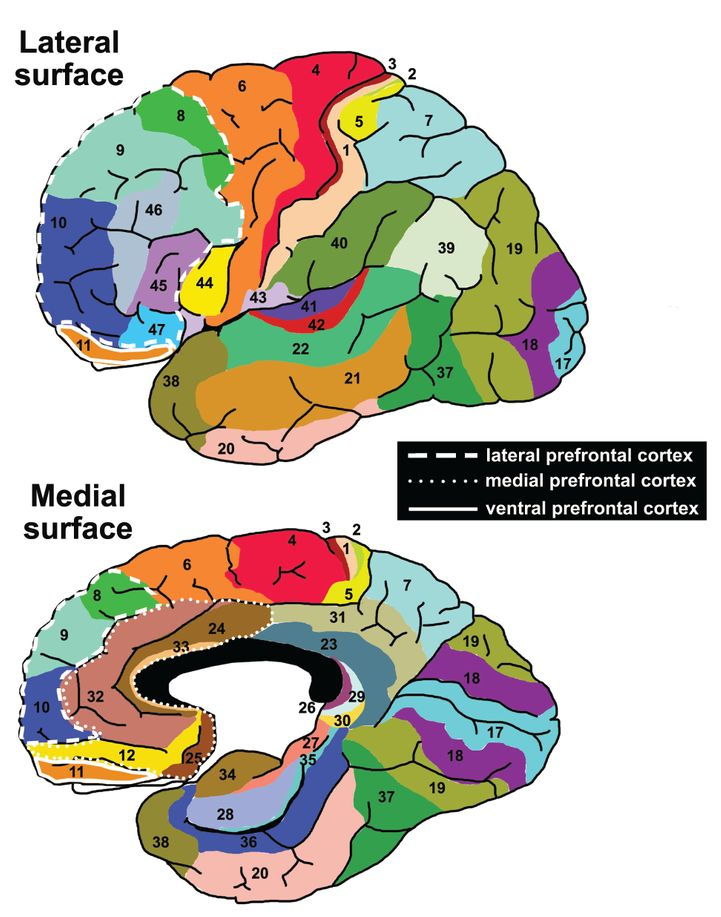
</div>

From this picture we consider that the Brodmann areas in the medial prefrontal cortex are:
- 24: Dorsal anterior cingulate cortex.
- 33: Rostral anterior cingulate cortex **There is one region with this name!**
- 32: Pregenual anterior cingulate cortex
- 12: No clear name. Possibly Orbitofrontal Area (orbital gyri, gyrus rectus, rostral gyrus and part of superior frontal gyrus) – receives information about the sight of objects as well as the reward value of taste. **We have medial oribitofrontal which actually takes a big chunk of space**
- 25: Subgenual anterior cingulate cortex

Let's plot them

In [10]:
for i, label in enumerate(conn.region_labels):
    if 'anteriorcingulate' in label or 'medialorbitofrontal' in label:
        print(f'region {label} has index {i}')

region caudalanteriorcingulate_L has index 2
region caudalanteriorcingulate_R has index 3
region medialorbitofrontal_L has index 28
region medialorbitofrontal_R has index 29
region rostralanteriorcingulate_L has index 52
region rostralanteriorcingulate_R has index 53


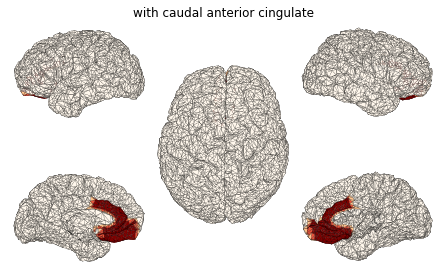

In [11]:
title = 'with caudal anterior cingulate'
multiview_one(cortex, hem_left, hem_right, 
              [2, 3, 28, 29, 52, 53], the_data, plt.figure(), suptitle='', 
              title=title, figsize=(5, 5), shaded=False)

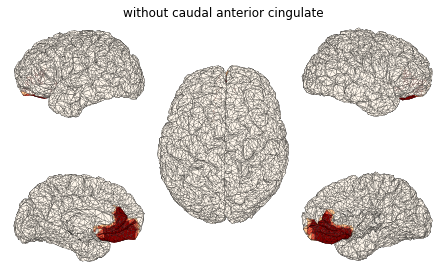

In [12]:
title = 'without caudal anterior cingulate'
multiview_one(cortex, hem_left, hem_right, 
              [28, 29, 52, 53], the_data, plt.figure(), suptitle='', 
              title=title, figsize=(5, 5), shaded=False)

# DMN nodes that we will use for the analyses

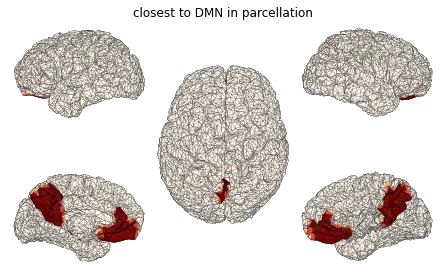

In [13]:
DMN_regions = [28, 29, 52, 53,  # mPFC
          50, 51, 20, 21]   # precuneus and posterior cingulate (seems large)

title = 'closest to DMN in parcellation'  # We are clearly missing the angular gyri
multiview_one(cortex, hem_left, hem_right, 
              DMN_regions, the_data, plt.figure(), suptitle='', 
              title=title, figsize=(8, 8), shaded=False)

# Obtaining the pearson correlation coefficient between nodes taking into account the DMN

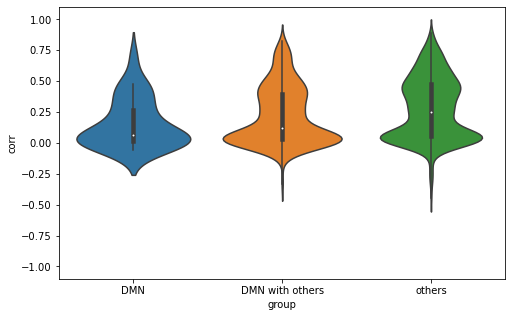

In [14]:
fig, ax = plot_corr_dmn(corr_dmn(FR_exc), type_plot='violin', jitter=False)
plt.show()

# Let's obtain the plots for the original set of parameters and b=0 and b=60

We want to try to see the differences through multiple trials. For that, we have simulated, both for b=0 and b=60 pA, 20 different runs of the simulation, slightly changing the initial conditions. One has to be careful and make sure that the changing of the IC does not push the model towards the broken point. Additionally, it is always interesting to check that the different runs are indeed different. It has happened to me multiple times that changing little details result in equal simulations.

In [17]:
# Simulate all the trials
parameters = Parameter()
bs = [0, 60]
folder_root = '/media/master/Nuevo vol/Internship/Data/hpc_tvbadex/results_test_DMN/results_seeds/'
sim = False

if sim:
    for simnum in range(len(bs)):
        parameters.parameter_model['b_e'] = bs[simnum]

        label_sim = '_b_e' + str(bs[simnum]) + '/'

        file_name = folder_root + label_sim
        parameters.parameter_simulation['path_result'] = file_name

        # Set up simulator with new parameters
        simulator = tools.init(parameters.parameter_simulation, parameters.parameter_model,
                               parameters.parameter_connection_between_region,
                               parameters.parameter_coupling,
                               parameters.parameter_integrator,
                               parameters.parameter_monitor)

        # Run simulations
        tools.run_simulation(simulator, run_sim, parameters.parameter_simulation, parameters.parameter_monitor)

560
9600
35400


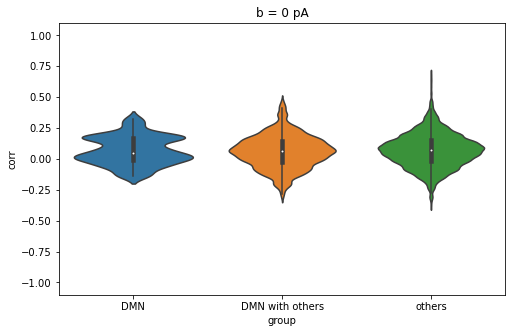

560
9600
35400


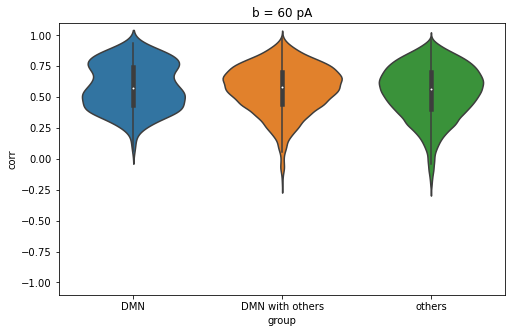

In [18]:
# Obtain the correlations. It is also possible to plot all the time-traces to make sure they are different
steps = 20
seeds = np.arange(20, 20 + steps)

# Plotting options
check_diffs = False # To check if each simulation is different from the next one
type_plot = 'violin'
jitter = False
for b in bs:
    datas = []
    for seed in seeds:
        label_sim = '_b_' + str(b) + '_s_' + str(seed) + '/'
        file_name = folder_root + label_sim
        result = tools.get_result(file_name, cut_transient, run_sim)
        time_s = result[0][0] * 1e-3  # from ms to sec

        # Decide which one to analyze since they usually exhibit very similar behavior
        FR_exc = result[0][1][:, 0, :] * 1e3  # from KHz to Hz; Excitatory firing rate
        FR_inh = result[0][1][:, 1, :] * 1e3  # from KHz to Hz; Inhibitory firing rate
        datas.append(corr_dmn(FR_exc))
        if check_diffs:
            if seed > 20:
                print(np.sum(np.abs(FR_exc - FR_old)))
            FR_old = FR_exc
            fig, ax = plt.subplots(1, 1, figsize=(10, 8))
            ax.plot(time_s, FR_inh, label=r'$v_i$', c='r')
            ax.plot(time_s, FR_exc, label=r'$v_e$', c='g')
            #ax.set(title=f'S: {S}', xlabel='Time(s)', ylabel='FR(Hz)',
            #      xlim=(2, 5), ylim=(0, 5 + max([np.amax(FR_exc), np.amax(FR_inh)])))
            plt.show()
        
    data = pd.concat(datas)
    print(data[data['group'] == 'DMN'].shape[0])
    print(data[data['group'] == 'DMN with others'].shape[0])
    print(data[data['group'] == 'others'].shape[0])
    # Plot the aggregated data over the 20 different seeds.
    fig, ax = plot_corr_dmn(data, type_plot='violin', jitter=False)
    ax.set_title(f'b = {b} pA')
    plt.show()

# Violin plots of FR of DMN nodes and others (discuss and to be added to the analyses.py file)

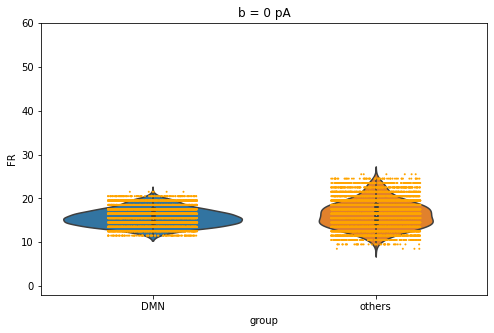

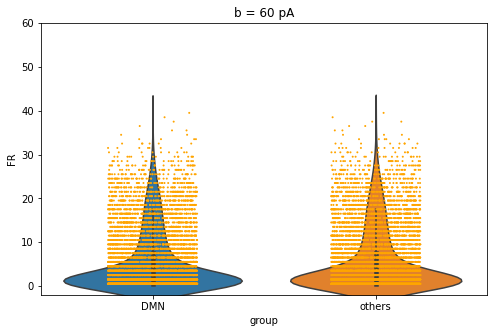

In [19]:
# Obtain the correlations. It is also possible to plot all the time-traces to make sure they are different
steps = 20
seeds = np.arange(20, 20 + steps)
folder_root = '/media/master/Nuevo vol/Internship/Data/hpc_tvbadex/results_test_DMN/results_seeds/'

for b in bs:
    for seed in seeds:
        label_sim = '_b_' + str(b) + '_s_' + str(seed) + '/'
        file_name = folder_root + label_sim
        result = tools.get_result(file_name, cut_transient, run_sim)
        time_s = result[0][0] * 1e-3  # from ms to sec

        # Decide which one to analyze since they usually exhibit very similar behavior
        FR_exc = result[0][1][:, 0, :] * 1e3  # from KHz to Hz; Excitatory firing rate
        FR_inh = result[0][1][:, 1, :] * 1e3  # from KHz to Hz; Inhibitory firing rate
        if seed == seeds[0]:
            hist_DMN, hist_others, bins_edges = hist_FR_dmn(FR_inh)
        else:
            hist_DMN_aux, hist_others_aux, _ = hist_FR_dmn(FR_inh)
            hist_DMN += hist_DMN_aux
            hist_others += hist_others_aux
            
    hist_DMN /= seeds.size
    hist_others /= seeds.size    
    
    fig, ax = plot_violin_hist_FR(hist_DMN, hist_others, bins_edges, jitter=True)
    ax.set_title(f'b = {b} pA')
    plt.show()


Very curious pattern on the spiky shape of the FR_inh in DMN for b=0. It would be interesting to discuss that!

Why could we have that weird pattern? It looks like the effect of the histogram should be responsible but it is quite weird that it happens nonetheless even if we have 20 different seeds. It is also quite surprising since the values are in the middle quite large. It shouldn't be that spiked, instead it should be smoother. However, I don't know why it only happens to the DMN one. Maybe because of it has much less points? It should have the same though...

Okay, the problem seems to come from the bandwith of the kernel estimator used for the violin. Indeed, each dataset contains points @ each 1Hz, if the bandwith's not large enough then the kernel will show the spikes for each point. I should try to take the best bw for different parameters however this might be a bit a pain in the ass. Will see tomorrow how to look into this.

Also look at how the documentation is written! Useful!
https://seaborn.pydata.org/generated/seaborn.violinplot.html

# Trying to find regularities in activation

Main Idea: Trying to find average differences or average elements that appear in all the seeds. Trying to get close to fMRI methods to see which regions (voxels) are correlated between them. Then plot those regions with highest interest in the map and see if they look like the DMN.

For instance, we try to see the difference in activation, in each region, between the b=0pA state and the b=60pA state. To do this, we take the mean in time of each region both @ b=0 and b=60pA and subtract them. That way we have the change in mean activity per region.

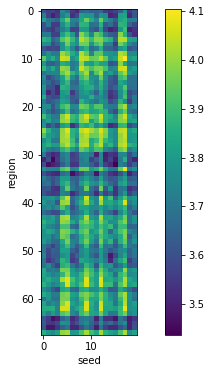

In [21]:
bs = [0, 60]
folder_root = '/media/master/Nuevo vol/Internship/Data/hpc_tvbadex/results_test_DMN/results_seeds/'

steps = 20
seeds = np.arange(20, 20 + steps)

avgs = np.empty((68, seeds.size))

for ii, seed in enumerate(seeds):
    datas = []
    FRs = []
    for b in bs:
        label_sim = '_b_' + str(b) + '_s_' + str(seed) + '/'
        file_name = folder_root + label_sim
        result = tools.get_result(file_name, cut_transient, run_sim)
        time_s = result[0][0] * 1e-3  # from ms to sec

        # Decide which one to analyze since they usually exhibit very similar behavior
        FR_exc = result[0][1][:, 0, :] * 1e3  # from KHz to Hz; Excitatory firing rate
        FR_inh = result[0][1][:, 1, :] * 1e3  # from KHz to Hz; Inhibitory firing rate
        FRs.append(FR_exc)
    
    avgs[:, ii] = np.mean(FRs[0], axis=0) - np.mean(FRs[1], axis=0)


fig, ax = plt.subplots(1, 1, figsize=(10, 6))
im = ax.imshow(avgs)
ax.set(xlabel='seed', ylabel='region')
plt.colorbar(im)
plt.show()

# Select the k regions whose mean FRs change the most (least) between b=0 and b=60 pA

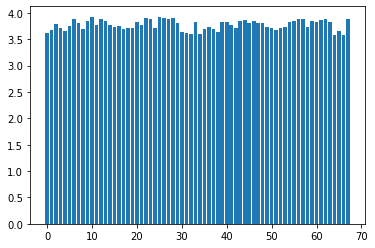

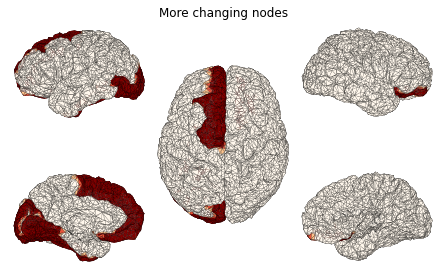

In [22]:
# Select the k most changing regions and plotting them
mean_regions = np.mean(avgs, axis=1)
plt.bar(np.arange(0, 68), mean_regions)
k = 8

idx = np.argpartition(mean_regions, -k)[-k:]
cortex, conn, hem_left, hem_right = prepare_surface_regions_human(parameters, 
                                                                  conn_filename='Connectivity.zip',
                                                                  zip_filename='Surface_Cortex.zip',
                                                                  region_map_filename='RegionMapping.txt')
the_data = np.zeros((cortex.region_mapping_data.array_data.shape[0],))

title = 'More changing nodes'
multiview_one(cortex, hem_left, hem_right, 
              idx.tolist(), the_data, plt.figure(), suptitle='', 
              title=title, figsize=(8, 8), shaded=False)

It is interesting that we kind of recover the left part of the DMN for this case. However, litterature seems to indicate that the correlations in the DMN do not change a lot when going from restful wake to deep sleep. There is one paper where the rostral part of the DMN seems to disconnect from the posterior part. Later papers mention that in said study participants were significantly sleep deprived which might affect the workings of the prefrontal cortex.

All in all, this method does not seem to be the best one to provide predictions from the model. Might be interesting to apply the same approach when applying stimuli, trying to simulate heavy cognitive activities, where other networks take more importance than the DMN.

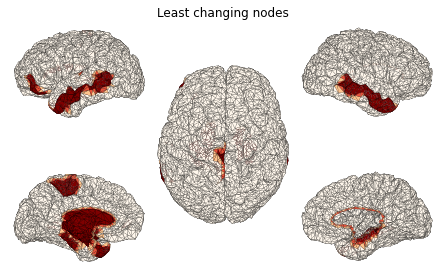

In [23]:
# Select the k least changing regions and plotting them
np.argmin(mean_regions)
k = 8

idx = np.argpartition(mean_regions, k)[:k]
cortex, conn, hem_left, hem_right = prepare_surface_regions_human(parameters, 
                                                                  conn_filename='Connectivity.zip',
                                                                  zip_filename='Surface_Cortex.zip',
                                                                  region_map_filename='RegionMapping.txt')
the_data = np.zeros((cortex.region_mapping_data.array_data.shape[0],))

title = 'Least changing nodes'
multiview_one(cortex, hem_left, hem_right, 
              idx.tolist(), the_data, plt.figure(), suptitle='', 
              title=title, figsize=(8, 8), shaded=False)

# Other approaches
The nodes in the DMN are not the ones that change the less in their mean value between the two cases. However, it is important to know that the DMN hubs are not the ones that change their activity from one to the other (or the ones that change less) instead they are regions that are **activated** in resting state and correlated between them. So maybe we should check other things.

For instance, we can check which are the nodes that have a higher mean both in b=0 and b=60. Maybe that gives us a clue. For instance try to plot the higher nodes in each of the cases. Then try to plot which regions are in the top 20% active in both cases. Shouldn't be too hard.

In [24]:
bs = [0, 60]
folder_root = '/media/master/Nuevo vol/Internship/Data/hpc_tvbadex/results_test_DMN/results_seeds/'
steps = 20
seeds = np.arange(20, 20 + steps)


mean_excs = []
mean_inhs = []

for b in bs:
    mean_exc = np.zeros((68, seeds.size))
    mean_inh = np.zeros_like(mean_exc)
    
    for ii, seed in enumerate(seeds):
        label_sim = '_b_' + str(b) + '_s_' + str(seed) + '/'
        file_name = folder_root + label_sim
        result = tools.get_result(file_name, cut_transient, run_sim)
        FR_exc = result[0][1][:, 0, :] * 1e3  # from KHz to Hz; Excitatory firing rate
        FR_inh = result[0][1][:, 1, :] * 1e3  # from KHz to Hz; Inhibitory firing rate
    
        mean_exc[:, ii] = np.mean(FR_exc, axis=0)
        mean_inh[:, ii] = np.mean(FR_inh, axis=0)
    mean_excs.append(mean_exc)
    mean_inhs.append(mean_inh)

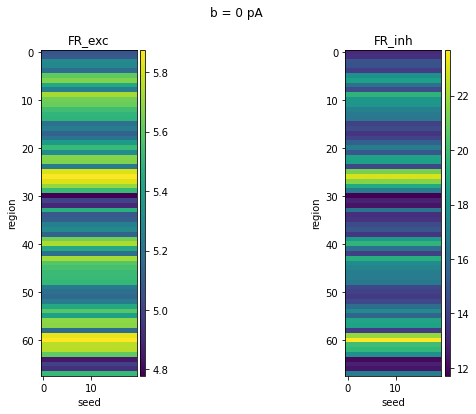

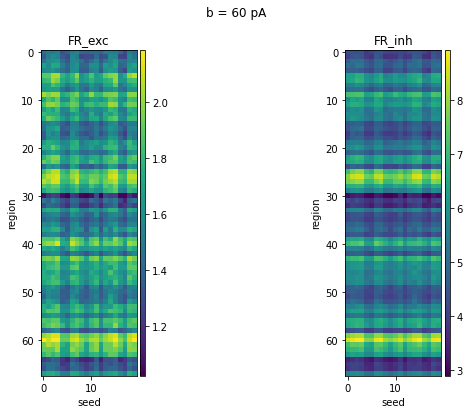

In [25]:
for ii, b in enumerate(bs):
    fig, axes = plt.subplots(1, 2, figsize=(10, 6))
    ax = axes[0]
    im = ax.imshow(mean_excs[ii])
    ax.set(xlabel='seed', ylabel='region', title='FR_exc')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    
    ax=axes[1]
    im = ax.imshow(mean_inhs[ii])
    ax.set(xlabel='seed', ylabel='region', title='FR_inh')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    fig.suptitle(f'b = {b} pA')
    plt.show()

Re-simulated the b=0 pA case adding more exaggerated ICs as well as marginally and randomly increasing b a little bit. The results were not really different compared to the ones obtained in deep sleep.

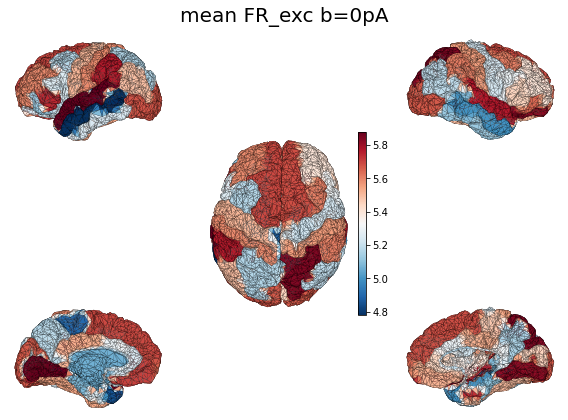

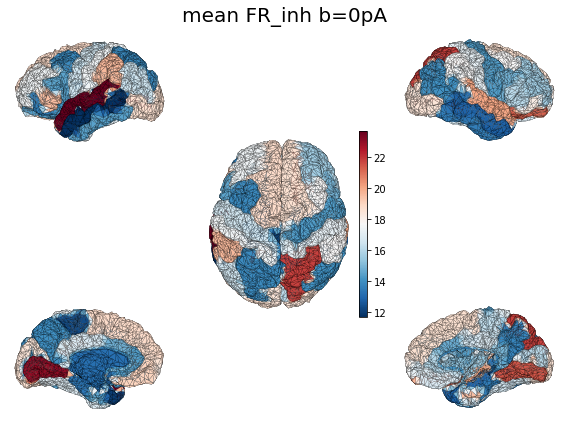

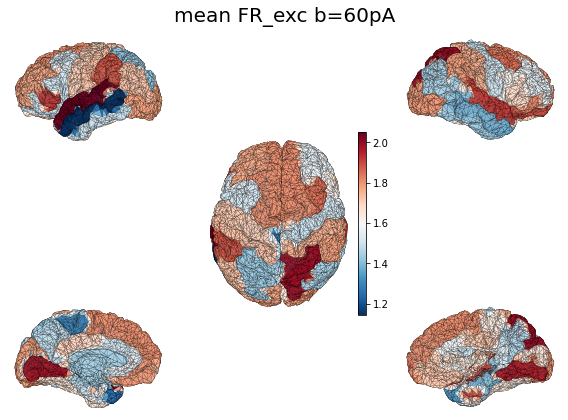

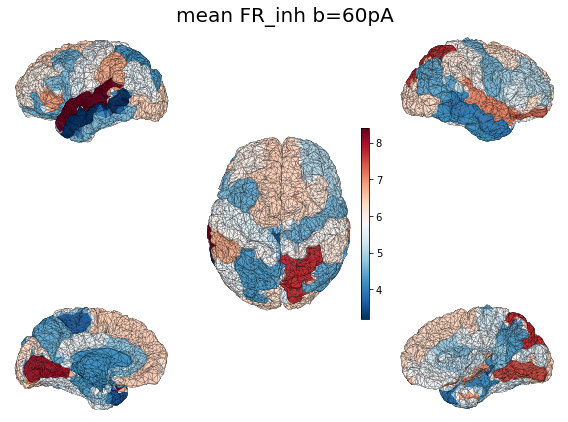

In [26]:
mean_mean_excs = []
mean_mean_inhs = []

for ii, b in enumerate(bs):
    # Let's take the means along seeds:
    mean_mean_excs.append(np.mean(mean_excs[ii], axis=1))
    mean_mean_inhs.append(np.mean(mean_inhs[ii], axis=1))  # Now (68, ) array with mean in time avg over trials
    # Now order them and maybe obtain 4 different plots? Maybe interesting to use the zscore plot as well!
    idx_regions = np.arange(68)
    zlim = (np.amin(mean_mean_excs[ii]), np.amax(mean_mean_excs[ii]))
    fig = multiview_z_score(cortex, hem_left, hem_right, idx_regions, mean_mean_excs[ii], 
                            zlim=zlim, title=f'mean FR_exc b={b}pA', figsize=(8, 8))
    plt.show()
    zlim = (np.amin(mean_mean_inhs[ii]), np.amax(mean_mean_inhs[ii]))
    fig = multiview_z_score(cortex, hem_left, hem_right, idx_regions, mean_mean_inhs[ii], 
                            zlim=zlim, title=f'mean FR_inh b={b}pA', figsize=(8, 8))
    plt.show()

### Building a function that will obtain the k (k=10) regions with higher mean FR and check how many of the DMN are in the top k. Maximum ratio is 0.8, which would be ideal.

In [27]:
def ratio_most_active_from_dmn(fr, dmn_regions=None, k=10):
    """Function that selects the k regions with highest mean FR and checks how many DMN regions are in
    the top 10."""

    if dmn_regions is None:
        dmn_regions = [28, 29, 52, 53,  # mPFC
                       50, 51, 20, 21]  # precuneus / posterior cingulate

    mean_t_FR = np.mean(fr, axis=0)  # (M, ) of mean FR of each region

    k_most_active = np.argpartition(mean_t_FR, -k)[-k:]
    print(k_most_active)
    count_in_dmn = 0
    for active_region in k_most_active:
        if active_region in dmn_regions:
            count_in_dmn += 1

    ratio_most_active = count_in_dmn / k

    return ratio_most_active

# Seeding approach

How do we do the seeding approach? We take the the precuneus as the seed region and obtain the correlations of all the other regions with this seed. We can do both left and right and see the brain maps. Then we apply Fisher's transofmration to obtain z-scores and afterwards we plot the maps.

In [28]:
# Let's obtain the FR of one possible situation
folder_root = '/media/master/Nuevo vol/Internship/Data/hpc_tvbadex/results_jusuf/' # Hard disk in ubuntu
cut_transient = 2000.0
run_sim = 5000.0
S = 0.5
b_e = 120.0
E_L_e = -60.0
E_L_i = -80.0
T = 40.0

label_sim = '_a_' + str(S) + '_b_' + str(b_e) + '_ELI_' + str(E_L_i) + \
            '_ELE_' + str(E_L_e) + '_T_' + str(T) + '/'

file_name = folder_root + label_sim

result = tools.get_result(file_name,cut_transient,run_sim)
time_s = result[0][0]*1e-3 #from ms to sec
FR_exc = result[0][1][:,0,:]*1e3 # from KHz to Hz; Excitatory firing rate
FR_inh = result[0][1][:,1,:]*1e3 # from KHz to Hz; Inhibitory firing rate
del result

/home/master/Desktop/tests_hpc/JUSUFlike/Project/Codes/analyses.py:977: RuntimeWarning: divide by zero encountered in arctanh
  zscores = np.arctanh(corrs_with_seed)
/tmp/ipykernel_30642/795812615.py:13: RuntimeWarning: divide by zero encountered in arctanh
  z_value_wrt_seed = np.arctanh(corrs_wrt_seed)


0.3
[-3.49229992e-02 -1.85385971e-02 -4.71256440e-04  1.11199843e-02
  3.77028485e-02  3.85974895e-02  4.32344554e-02  4.32464410e-02
  4.63225524e-02  5.77540057e-02  5.86293390e-02  6.55182279e-02
  6.73208479e-02  7.57215320e-02  8.36905997e-02  9.00195184e-02
  9.48621361e-02  1.00792522e-01  1.05113040e-01  1.11123447e-01
  1.44727605e-01  1.45880306e-01  1.52867882e-01  1.53074351e-01
  1.53637779e-01  1.54402744e-01  1.56056050e-01  1.57388385e-01
  1.61537779e-01  1.62124031e-01  1.65245314e-01  1.73567118e-01
  1.75624525e-01  1.80155768e-01  1.85538146e-01  1.89741099e-01
  1.90398564e-01  2.05901091e-01  2.07036863e-01  2.10187455e-01
  2.18552967e-01  2.36824931e-01  2.45164926e-01  2.60086795e-01
  2.65574517e-01  2.67266189e-01  2.90664352e-01  2.93980459e-01
  3.05364231e-01  3.09339553e-01  3.62007092e-01  3.62849177e-01
  3.84055951e-01  4.02454310e-01  4.41168454e-01  4.75772704e-01
  5.28284566e-01  5.78246016e-01  7.27340623e-01  7.56818368e-01
  7.94441397e-01  8.0

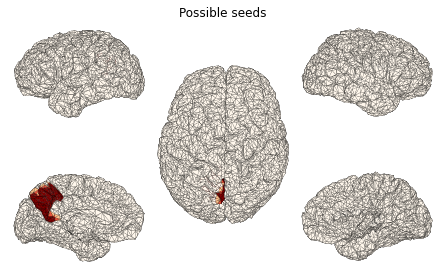

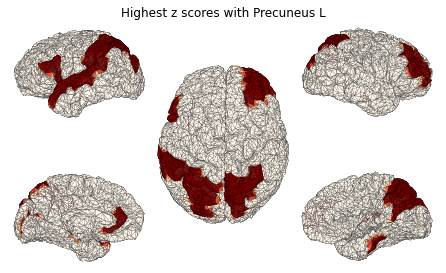

In [29]:
# Precuneus and cingulate regions
possible_seed = 50 #[50, 51, 20, 21]  # precuneus and posterior cingulate (seems large)
multiview_one(cortex, hem_left, hem_right, 
              possible_seed, the_data, plt.figure(), suptitle='', 
              title='Possible seeds', figsize=(8, 8), shaded=False)

# Let's choose first region 50 precuneus L

# We obtain the correlations with it
FC = np.corrcoef(FR_exc.T)
print(ratio_zscore_from_dmn(FC, seed=50, dmn_regions=None, k=10))
corrs_wrt_seed = FC[:, possible_seed]
z_value_wrt_seed = np.arctanh(corrs_wrt_seed)
print(np.sort(z_value_wrt_seed))

idx_regions_without_seed = np.concatenate((np.arange(0, possible_seed), np.arange(possible_seed+1, 68)))


k = 12

idx = np.argpartition(z_value_wrt_seed[idx_regions_without_seed], -k)[-k:]
idx = idx_regions_without_seed[idx]
title = 'Highest z scores with Precuneus L'

# It would be interesting to modify this function so that we can include the seed and it can be highlighted in green

the_data = np.zeros((cortex.region_mapping_data.array_data.shape[0],))
multiview_one(cortex, hem_left, hem_right, 
              idx.tolist(), the_data, plt.figure(), suptitle='', 
              title=title, figsize=(8, 8), shaded=False)

### Building a function that counts the k most correlated regions with the seed (using z-score) and counts how many of the top 10 belong to the DMN. 

In [30]:
def ratio_zscore_from_dmn(FC, seed=50, dmn_regions=None, k=10):
    """Function that selects the k regions more correlated with the seed region and checks how many DMN 
    regions are in that top 10. Minimum ratio of 0.1 since the seed region will have largest zscore."""

    if dmn_regions is None:
        dmn_regions = [28, 29, 52, 53,  # mPFC
                       50, 51, 20, 21]  # precuneus / posterior cingulate
    
    corrs_with_seed = FC[:, seed]
    zscores = np.arctanh(corrs_with_seed)
    k_more_correlated = np.argpartition(zscores, -k)[-k:]
    
    count_in_dmn = 0
    for active_region in k_more_correlated:
        if active_region in dmn_regions:
            count_in_dmn += 1

    ratio_zscore = count_in_dmn / k

    return ratio_zscore

# Plotting the zscores of transforming correlations of all regions with a seed region

It would be possible to threshold the correlations as well and then obtain try to paint them similar to the ones in fMRI data. To do that one would need to perform a significant threshold of the obtained z_value_wrt_seed and set the other values to 0.

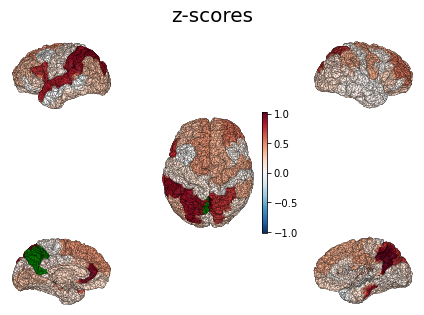

In [31]:
parameters = Parameter()

# Prepare the elements that we will need to find the interesting nodes
cortex, conn, hem_left, hem_right = prepare_surface_regions_human(parameters,
                                                                  conn_filename='Connectivity.zip',
                                                                  zip_filename='Surface_Cortex.zip',
                                                                  region_map_filename='RegionMapping.txt')


zlim = np.amax(np.abs(z_value_wrt_seed[idx_regions_without_seed]))

fig = multiview_z_score(cortex, hem_left, hem_right, idx_regions_without_seed, 
                        z_value_wrt_seed, zlim=zlim, seed_region=possible_seed,
                        title='z-scores', figsize=(6, 6))
plt.tight_layout()
plt.show()

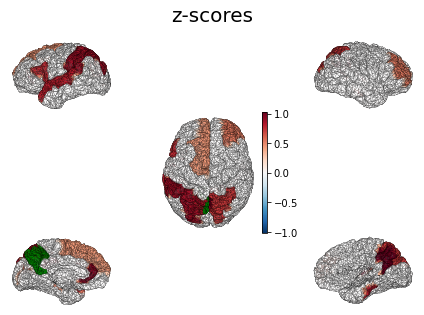

In [32]:
# Applying a threshold
max_z = np.amax(z_value_wrt_seed[idx_regions_without_seed])

threshold_ratio = 0.4
threshold = threshold_ratio * max_z

z_value_wrt_seed[threshold > z_value_wrt_seed] = 0

zlim = np.amax(np.abs(z_value_wrt_seed[idx_regions_without_seed]))

fig = multiview_z_score(cortex, hem_left, hem_right, idx_regions_without_seed, 
                        z_value_wrt_seed, zlim=zlim, seed_region=possible_seed,
                        title='z-scores', figsize=(6, 6))
plt.tight_layout()
plt.show()